# Grouping

https://carmengg.github.io/eds-220-book/lectures/lesson-6-groupby.html

We will use palmer penguins data

In [3]:
import pandas as pd 

# read in Palmer penguins data
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")

# number of rows
print(len(penguins))

# head
penguins.head()

344


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary stats

In pandas it is easy to get summary statistics for each column in a dataframe by using methods such as

- sum(): sum values in each column,
- count(): count non-NA values in each column,
- min() and max(): get the minimum and maximum value in each column,
- mean() and median(): get the mean and median value in each column,
- std() and var(): get the standard deviation and variance in each column.

Ex:

In [4]:
# get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [5]:
# get the minimum value in each column
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping

Our penguins data can be naturally split into islands, sex, species, year

Often, we want to calculate summary stats for these groups using `groupby()`

Our penguins data is naturally split into different groups: there are three different species, two sexes and three islands. Often, we want to calculate a certain statistic for each group. For example, suppose we want to calculate the average flipper length per species. 

How would we do this “by hand”?

- We start with our data and notice there are multiple species in the species column.

- We split our original table to group all observations from the same species together.

- We calculate the average flipper length for each of the groups we formed.

- Then we combine the values for average flipper length per species into a single table.

This is known as the **Split-Apply-Combine strategy**. This strategy follows the three steps we explained above:

1. Split: Split the data into logical groups (e.g. species, sex, island, etc.)

2. Apply: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)

3. Combine: Combine the statistic calculated on each group back together.

In Python we can use the groupby() method to split (i.e. group) the data into different categories. The general syntax for groupby() is

`df.groupby(columns_to_group_by)`

where most often we will have columns_to_group_by = a single column name (string) or a list of column names, the unique values of the column (or columns) will be used as the groups of the data frame

**Example:** calculate mean flipper length by species

1. Find the method that calculates the mean: mean()

Note: First, if we don’t use the groupby() method, we obtain the average for the whole flipper length column:

In [7]:
# ave of whole column (all species)
penguins.flipper_length_mm.mean()

200.91520467836258

To get mean flipper length
1. group by species
2. apply mean function

Remember the syntax:

`df.groupby(columns_to_group_by)`

In [8]:
# mean of all columns by species
penguins.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


In [11]:
# mean of just the flipper length by species
penguins.groupby('species').mean().flipper_length_mm

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

We can also group by combinations of columns.

Example:

Suppose we want to know what was the number of penguins in every island on different years. We can use the count() method to count the number of non-NA values in each column like this:

In [12]:
# count non-na values in each column
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

When we group by island and year we get the count of non-NA values for each column divided for each combination of island and year:

In [16]:
# group by island and year then get the non-na value counts for each combination
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

Let’s say we want to plot the surveyed population per year and island. We could then use a “one liner” to do it in this way:

<AxesSubplot:ylabel='island,year'>

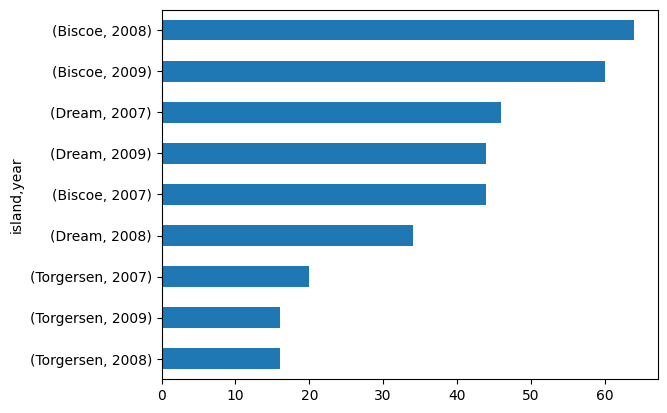

In [17]:
penguins.groupby(['island','year']).count().species.sort_values().plot(kind='barh')